In [1]:
import pykite as pk
from utils import dql, dql_eval, plot_trajectory
from learning.deep.models import NN
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_attack=pk.coefficients.shape[0]
n_bank=pk.bank_angles.shape[0]
n_beta=pk.n_beta
gamma=1
eps0=0.01
eta0=0.1
episode_duration=300
learning_step=0.2
horizon=int(episode_duration/learning_step)
integration_step=0.001
integration_steps_per_learning_step=int(learning_step/integration_step)

In [3]:
param_list=[]
for i, param in enumerate(net.parameters()):
    if i==0:
        param_list=torch.flatten(param).detach().numpy()
plt.hist(param_list, bins=np.arange(-20,14)*3)

NameError: name 'net' is not defined

In [5]:
torch.manual_seed(0)
np.random.seed(0)
net=NN()

durations, rewards=dql(net, 1000, horizon, learning_step, integration_step, integration_steps_per_learning_step, pk.vect(np.pi/6, 0, 50), pk.vect(0, 0, 0), pk.vect(10, 0, 0), lr_decay_start=100000, eps_decay_start=200000)

0
epsilon  0.01  eta 0.1 Simulation failed at learning step:  39  reward  -283702.5207423754
1
epsilon  0.01  eta 0.1 Simulation failed at learning step:  2  reward  -300000.0
2
epsilon  0.01  eta 0.1 Simulation failed at learning step:  43  reward  -280846.91542890196
3
epsilon  0.01  eta 0.1 Simulation failed at learning step:  180  reward  -162823.14863106314
4
epsilon  0.01  eta 0.1 Simulation failed at learning step:  1  reward  -300000.0
5
epsilon  0.01  eta 0.1 Simulation failed at learning step:  444  reward  311383.84634013934
6
epsilon  0.01  eta 0.1 Simulation failed at learning step:  17  reward  -294255.50331796065
7
epsilon  0.01  eta 0.1 Simulation failed at learning step:  25  reward  -299549.0056582809
8
epsilon  0.01  eta 0.1 Simulation failed at learning step:  105  reward  -238394.85114218964
9
epsilon  0.01  eta 0.1 Simulation failed at learning step:  3  reward  -300000.0
10
epsilon  0.01  eta 0.1 Simulation failed at learning step:  13  reward  -298642.8064046857

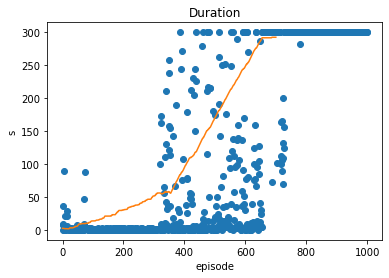

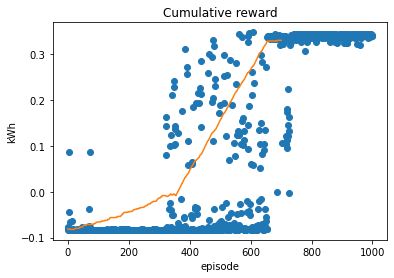

In [6]:
plt.figure()
plt.title("Duration")
s_durations=np.array(durations)*0.2
plt.plot(s_durations, 'o')
plt.plot(np.convolve(s_durations, np.ones(300), 'valid') / 300)
plt.xlabel("episode")
plt.ylabel("s")
plt.show()
plt.figure()
kwh_rewards=np.array(rewards)/3.6e6
plt.title("Cumulative reward")
plt.plot(kwh_rewards, 'o')
plt.plot(np.convolve(kwh_rewards, np.ones(300), 'valid') / 300)
plt.xlabel("episode")
plt.ylabel("kWh")
plt.show()

tensor(1341.0790, grad_fn=<MaxBackward1>)
tensor(1157.8263, grad_fn=<MaxBackward1>)
tensor(1028.3695, grad_fn=<MaxBackward1>)
tensor(1021.1482, grad_fn=<MaxBackward1>)
tensor(905.2560, grad_fn=<MaxBackward1>)
tensor(977.5585, grad_fn=<MaxBackward1>)
tensor(882.6784, grad_fn=<MaxBackward1>)
tensor(876.0195, grad_fn=<MaxBackward1>)
tensor(842.2870, grad_fn=<MaxBackward1>)
tensor(781.2821, grad_fn=<MaxBackward1>)
tensor(786.2061, grad_fn=<MaxBackward1>)
tensor(743.4107, grad_fn=<MaxBackward1>)
tensor(692.2918, grad_fn=<MaxBackward1>)
tensor(686.8759, grad_fn=<MaxBackward1>)
tensor(653.3534, grad_fn=<MaxBackward1>)
tensor(600.5093, grad_fn=<MaxBackward1>)
tensor(594.9963, grad_fn=<MaxBackward1>)
tensor(565.6721, grad_fn=<MaxBackward1>)
tensor(506.2018, grad_fn=<MaxBackward1>)
tensor(488.7857, grad_fn=<MaxBackward1>)
tensor(480.4893, grad_fn=<MaxBackward1>)
tensor(414.6180, grad_fn=<MaxBackward1>)
tensor(414.3933, grad_fn=<MaxBackward1>)
tensor(415.5767, grad_fn=<MaxBackward1>)
tensor(416.2

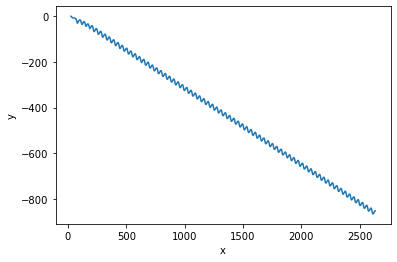

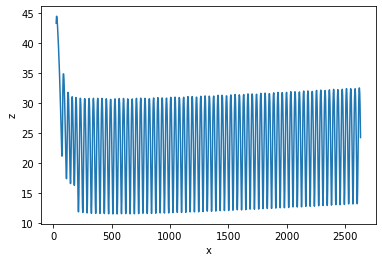

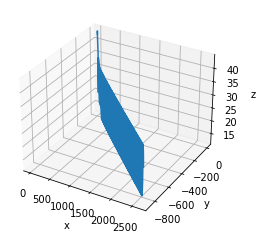

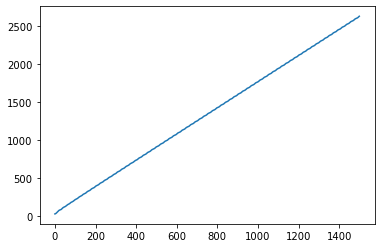

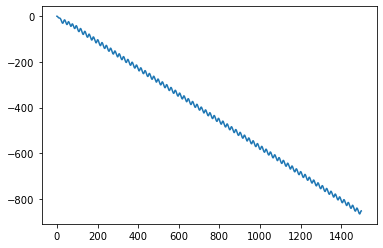

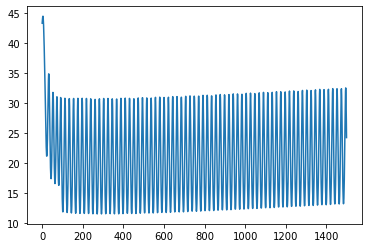

In [7]:
theta, phi, r=dql_eval(net, horizon, integration_step, integration_steps_per_learning_step, pk.vect(np.pi/6, 0, 50), pk.vect(0, 0, 0), pk.vect(10, 0, 0))

theta=np.array(theta)
phi=np.array(phi)
r=np.array(r)
x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))
y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
z=np.multiply(r, np.cos(theta))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.figure()
plt.xlabel("x")
plt.ylabel("z")
plt.plot(x,z)
plot_trajectory(theta[::1], phi[::1], r[::1])
plt.figure()
plt.plot(x)
plt.figure()
plt.plot(y)
plt.figure()
plt.plot(z)